In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# Load dataset
digits = datasets.load_digits()
X = digits.images
y = digits.target

In [4]:
# Flatten the 8x8 images to 64 features
X = X.reshape((X.shape[0], -1))
X = X / 16.0  # normalize to [0, 1]

In [5]:
# One-hot encode the labels
y_cat = to_categorical(y, num_classes=10)

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [8]:
# Build DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(64,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4188 - loss: 2.0458 - val_accuracy: 0.8056 - val_loss: 1.2305
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8536 - loss: 0.9622 - val_accuracy: 0.9097 - val_loss: 0.5230
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9069 - loss: 0.4636 - val_accuracy: 0.9306 - val_loss: 0.3062
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9391 - loss: 0.2856 - val_accuracy: 0.9236 - val_loss: 0.2482
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: 0.2033 - val_accuracy: 0.9375 - val_loss: 0.2062
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.1934 - val_accuracy: 0.9306 - val_loss: 0.1998
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9729 - loss: 0.1414 - val_accuracy: 0.9514 - val_loss: 0.1785
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9723 - loss: 0.1199 - val_accuracy: 0.9444 - val_loss

In [10]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9806


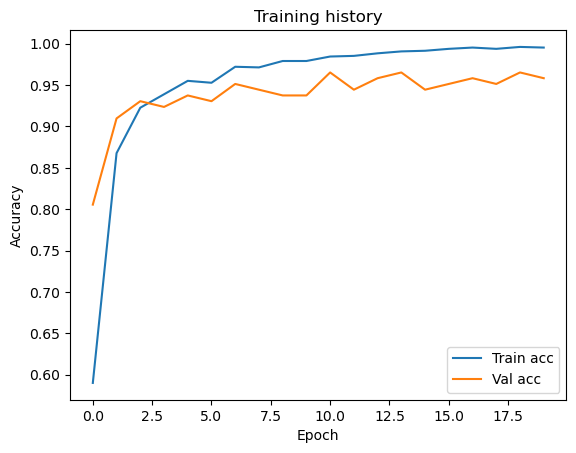

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training history')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


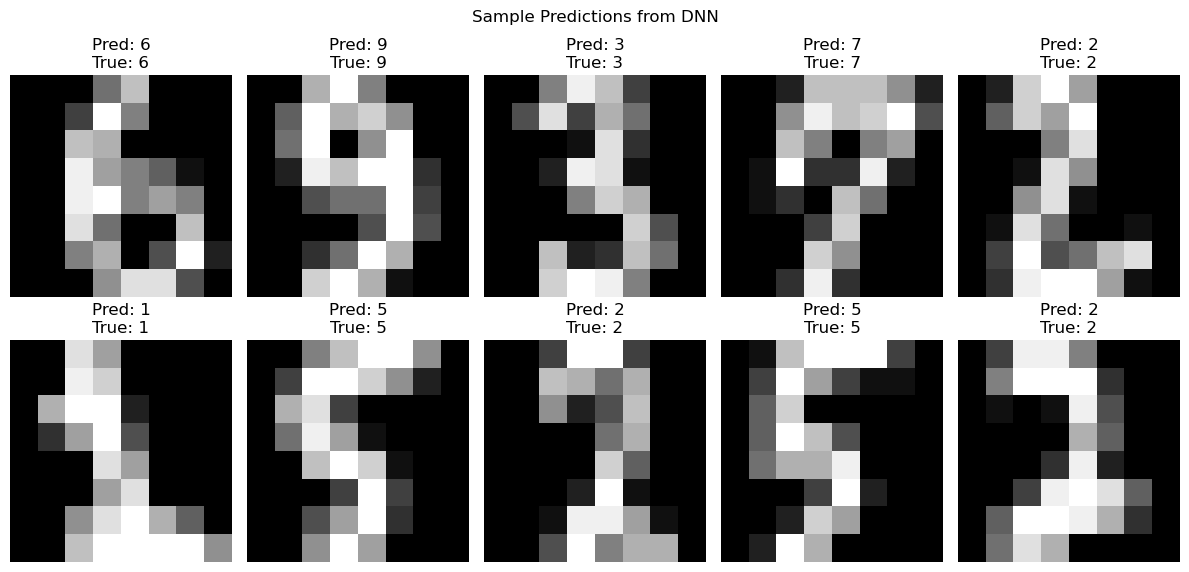

In [14]:

# Predict on test images
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Show a few sample predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image = X_test[i].reshape(8, 8) * 16  # Rescale back to original pixel values
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}\nTrue: {y_true_classes[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions from DNN")
plt.tight_layout()
plt.show()
